# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
!pip install mlflow==2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.6/752.6 kB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import mlflow
import mlflow.sklearn


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
zip_path = '/content/drive/MyDrive/wine+quality.zip'
extract_path = '/content/wine_data'

# Ekstrak ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("File hasil ekstraksi:", os.listdir(extract_path))


File hasil ekstraksi: ['winequality-white.csv', 'winequality.names', 'winequality-red.csv']


In [7]:
data_path = os.path.join(extract_path, '/content/wine_data/winequality-red.csv')
df = pd.read_csv(data_path, sep=';')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
print("Missing per kolom:\n", df.isnull().sum())
print("Jumlah duplikat:", df.duplicated().sum())

Missing per kolom:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Jumlah duplikat: 240


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


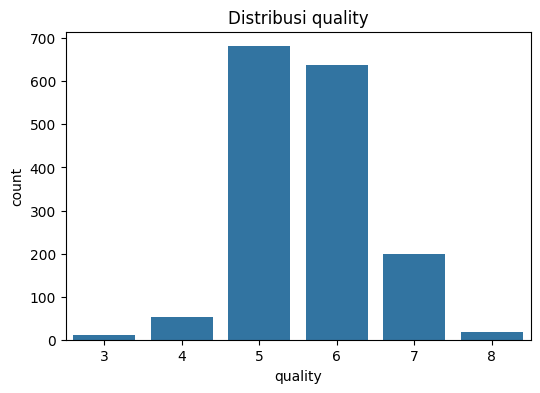

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title('Distribusi quality')
plt.show()

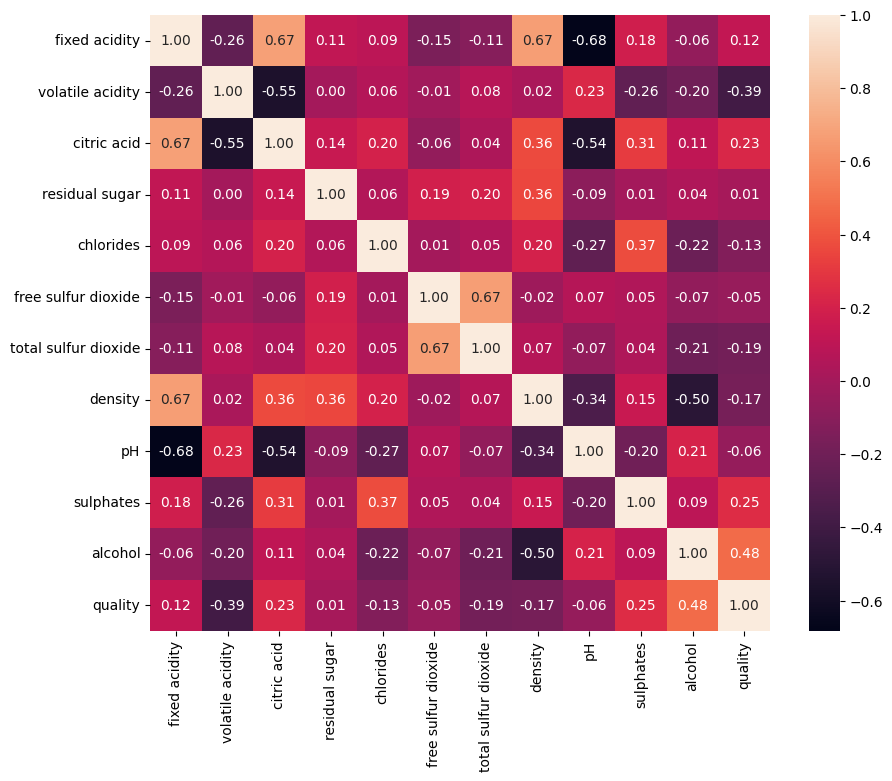

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

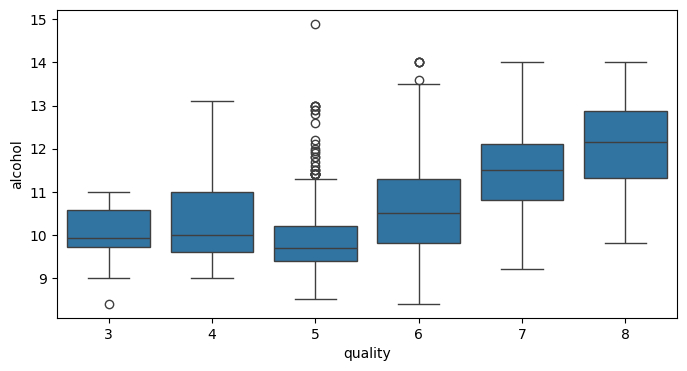

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
# Menghapus Data Duplikat
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Jumlah data sebelum: {before}, sesudah hapus duplikat: {after}")

Jumlah data sebelum: 1599, sesudah hapus duplikat: 1359


In [19]:
#Normalisasi atau Standarisasi Fitur
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df_no_outliers.drop('quality', axis=1)
y = df_no_outliers['quality']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat DataFrame baru hasil scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Contoh hasil standarisasi:")
print(X_scaled_df.head())

Contoh hasil standarisasi:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.520869          1.064261    -1.374692       -0.663370  -0.171530   
1      -0.249252          2.144860    -1.374692        0.889644   1.296165   
2      -0.249252          1.424461    -1.154320        0.224067   0.895885   
3       2.059490         -1.457136     1.710512       -0.663370  -0.238243   
4      -0.520869          0.824128    -1.374692       -0.885229  -0.238243   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450419             -0.318964  0.772698  1.416122  -0.612112   
1             1.139493              0.919586  0.148643 -0.930274   0.434990   
2             0.003842              0.431672  0.273454 -0.476133   0.173215   
3             0.230972              0.656863  0.897509 -1.233035  -0.437595   
4            -0.223288             -0.093774  0.772698  1.416122  -0.612112   

    alcohol  
0 -0.991002  
1

In [20]:
# Hapus outlier menggunakan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Jumlah data sebelum hapus outlier:", len(df))
print("Jumlah data setelah hapus outlier:", len(df_no_outliers))

Jumlah data sebelum hapus outlier: 1359
Jumlah data setelah hapus outlier: 1005


In [21]:
#Deteksi dan Penanganan Outlier

Q1 = df_no_outliers.quantile(0.25)
Q3 = df_no_outliers.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_no_outliers < (Q1 - 1.5 * IQR)) | (df_no_outliers > (Q3 + 1.5 * IQR))).sum()

print("Jumlah outlier per kolom setelah pembersihan:")
print(outliers)


Jumlah outlier per kolom setelah pembersihan:
fixed acidity           20
volatile acidity         4
citric acid              0
residual sugar           9
chlorides               15
free sulfur dioxide     12
total sulfur dioxide    28
density                  3
pH                      10
sulphates               14
alcohol                  3
quality                  0
dtype: int64


In [22]:
# Hapus outlier menggunakan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Jumlah data sebelum hapus outlier:", len(df))
print("Jumlah data setelah hapus outlier:", len(df_no_outliers))


Jumlah data sebelum hapus outlier: 1359
Jumlah data setelah hapus outlier: 1005


In [23]:
# Binning kualitas wine
bins = [0, 4, 6, 10]
labels = ['Low', 'Medium', 'High']
y_binned = pd.cut(y, bins=bins, labels=labels)

# Cek hasil binning
print("Distribusi setelah binning:")
print(y_binned.value_counts())

Distribusi setelah binning:
quality
Medium    857
High      115
Low        33
Name: count, dtype: int64


In [24]:
# Gabungkan kembali data yang sudah diproses
df_processed = X_scaled_df.copy()
df_processed['quality_category'] = y_binned

df_processed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,-0.520869,1.064261,-1.374692,-0.663370,-0.171530,-0.450419,-0.318964,0.772698,1.416122,-0.612112,-0.991002,Medium
1,-0.249252,2.144860,-1.374692,0.889644,1.296165,1.139493,0.919586,0.148643,-0.930274,0.434990,-0.582300,Medium
2,-0.249252,1.424461,-1.154320,0.224067,0.895885,0.003842,0.431672,0.273454,-0.476133,0.173215,-0.582300,Medium
3,2.059490,-1.457136,1.710512,-0.663370,-0.238243,0.230972,0.656863,0.897509,-1.233035,-0.437595,-0.582300,Medium
4,-0.520869,0.824128,-1.374692,-0.885229,-0.238243,-0.223288,-0.093774,0.772698,1.416122,-0.612112,-0.991002,NaN


In [25]:
# Define the output directory
output_dir = '/content/'

output_file = os.path.join(output_dir, "winequality_preprocessed.csv")
df_processed.to_csv(output_file, index=False)
print(f"Dataset hasil preprocessing disimpan ke: {output_file}")

Dataset hasil preprocessing disimpan ke: /content/winequality_preprocessed.csv
